In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from frake import GraphFunctions as gf

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def Wissa_sol(T_v, Z):
    n=200
    aux=0
    for i in range(n):
        aux+= np.cos((i+1)*np.pi*Z)*np.exp(-((i+1)*np.pi)**2*T_v) / (i+1)**2
    aux=aux*2/(np.pi**2)

    F=(1/6)*(2-6*Z+3*Z**2) - aux

    return F



c:\ProgramData\Anaconda3\lib\site-packages\frake\GraphFunctions.py:73: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{bm}']


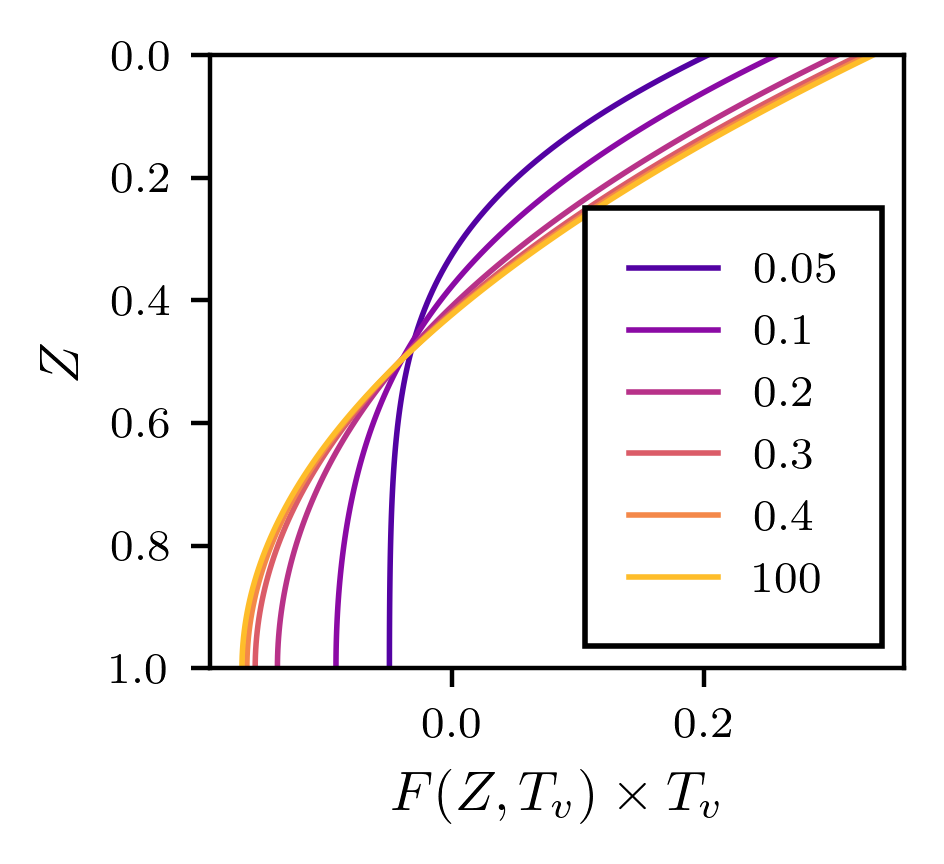

In [3]:
#Define a color palette
color_palette=sns.color_palette("plasma", 6)

C_v=1.0

#define Tvs array
Tvs=[0.05, 0.1, 0.2, 0.3, 0.4, 100]

#Define the z array
Z=np.linspace(0, 1, 100)

#Calculate axial strains
DATA=[]
for T_v in Tvs:
    strain=Wissa_sol(T_v, Z)
    #Create pandas dataframe strain and depth
    df=pd.DataFrame({'Strain':strain, 'Depth':Z})
    #Append to DATA
    DATA.append(df)


#Plot
gf.PlotAll(DATA, Tvs, 'Strain', 'Depth', palete=color_palette, hold=1, xsize=2.4, ysize=2.2, xlabel=r'$F(Z, T_v) \times T_v$', ylabel=r'$Z$')

#remove gap at 0,0
plt.ylim(0, 1)

#invert y axis
plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig('Wissa.svg')

C:\Users\zamcr\AppData\Local\Temp/ipykernel_47596/2209127747.py:8: RuntimeWarning: divide by zero encountered in log10
  cv_ratios=-(np.log10(1-u_ratios)/( 0.434*u_ratios))
C:\Users\zamcr\AppData\Local\Temp/ipykernel_47596/2209127747.py:8: RuntimeWarning: invalid value encountered in divide
  cv_ratios=-(np.log10(1-u_ratios)/( 0.434*u_ratios))


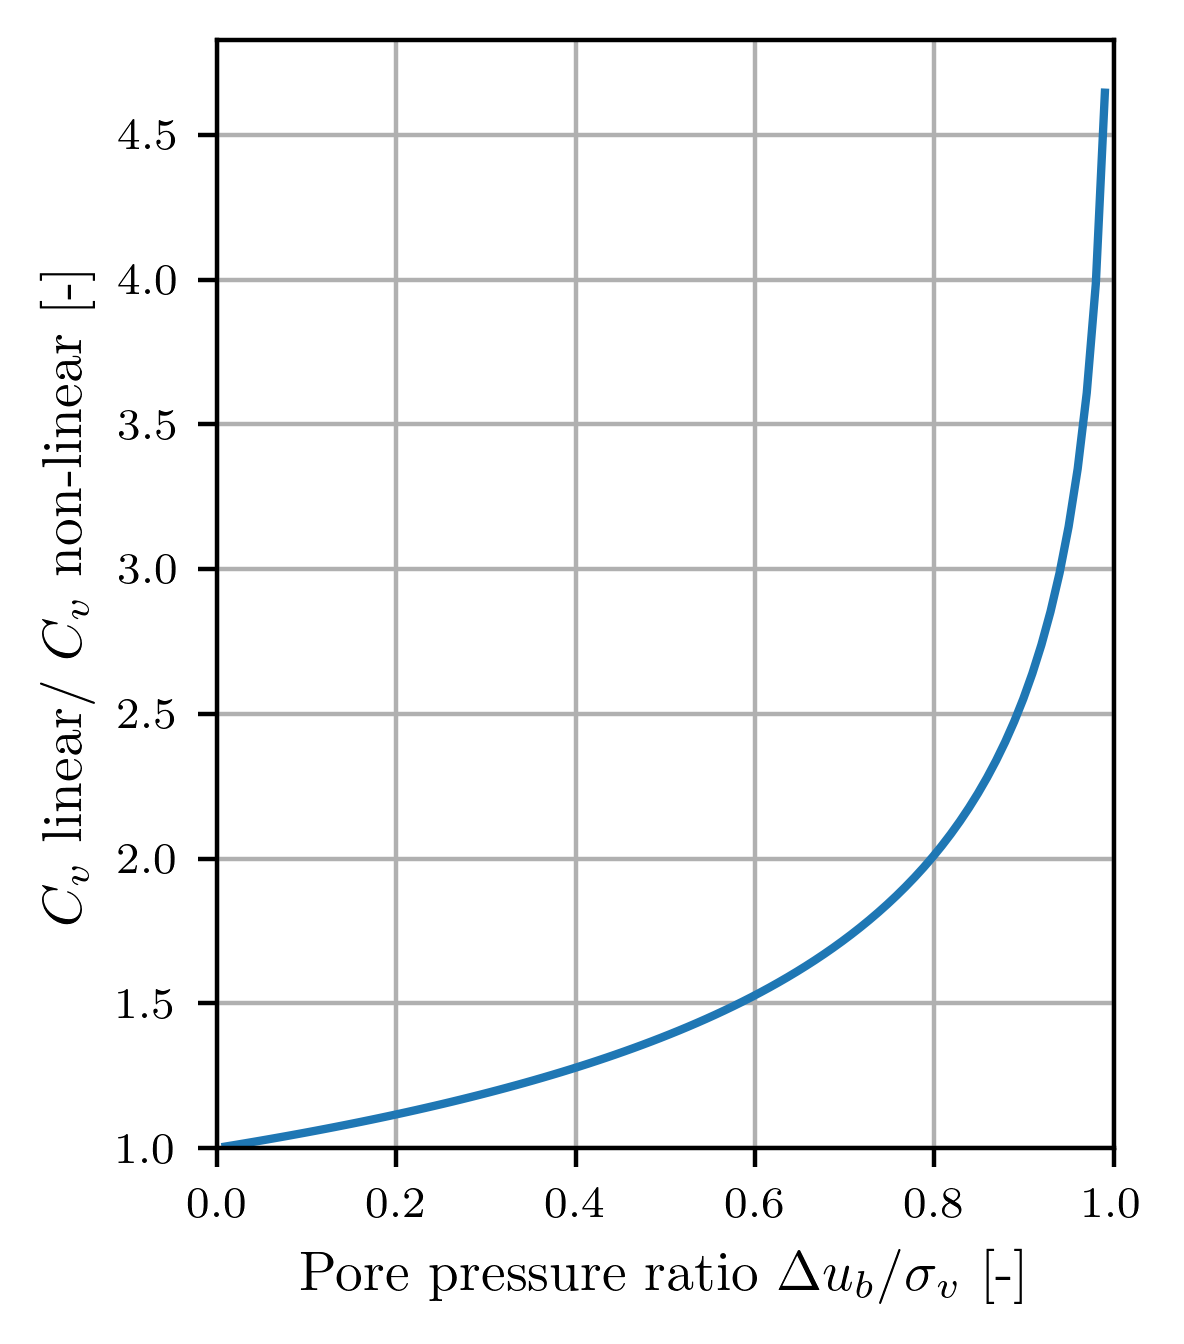

: 

In [11]:
# linea vs non-linear term

#define pore pressure ratios

u_ratios=np.linspace(0, 1, 100)

#calculate cv_ratios
cv_ratios=-(np.log10(1-u_ratios)/( 0.434*u_ratios))

#plot results
plt.figure()
plt.plot(u_ratios, cv_ratios)
plt.xlabel(r'Pore pressure ratio $\Delta u_b/\sigma_v$ [-]')
plt.ylabel(r'$C_v$ linear/ $C_v$ non-linear [-]')

# remove gap at 0,0
plt.ylim(1)
plt.xlim(0,1)
# make size in y direction 2.4 inches
plt.gcf().set_size_inches(3, 3.4)
plt.grid()
plt.tight_layout()
plt.savefig('cv_ratio.svg')
